### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">About Dataset</span>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Dataset</b>: <a href="https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval">Australian Credit Approval</a>
   </font>
</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       This file contains credit card applications.  All attribute names and values have been changed to meaningless
       symbols to protect confidentiality of the data.
       This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers
       of values, and nominal(refers to categorical data that doesn't have a numerical order.) with larger numbers of values.  There are also a few missing values.
   </font>
</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Goal of the Experiment</span>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Predicting group of customer who are fradulent. we are going to solve this problem in an unsupervised way.
   </font>
</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Required Packages</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Load Dataset</span>

In [2]:
dataset = pd.read_csv("dataset/Credit_Card_Applications.csv")

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Class 0</b>: It represents, application is rejected <br>
       <b>Class 1</b>: It represents, application is accepted
   </font>
</p>

In [4]:
# The values attribute returns the data in array format
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Feature Scaling</span>

In [5]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [6]:
# Initialize the SOM
som = MiniSom(x=10, y=10,       # This is the grid size which represents num of nodes (10 * 10 = 100)
              input_len=15,     # The dimensionality of the input data. This should match the number of features in your dataset.  
              sigma=1.0,        # The radius of the neighborhood function, which determines the extent of the influence a node has on its neighbors. A larger sigma means a broader area of influence.
              learning_rate=0.5 # The initial learning rate for the training process. It controls how much the weights are adjusted during each training step.
             )

In [7]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.5237854704718794


### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Data Visualization</span>

<p style="text-align: justify; text-justify: inter-word; font-size: 15px; text-indent: 50px;">
    We are going to plot all the winning nodes in the two dimentional grid graph. In this graph we are
    primarily going to depicts Mean Interneuron Distance(MID). In simple terms, MID is the mean of
    distances of winning node with its surrounding nodes. The higher MID of the node, it more away
    from its surrounding nodes. Therefore the <b>higher MID</b> node probably an outlier.<br>
    <strong>Note</strong>: More details can be found in appendix(<a href="#Mean-Interneuron-Distance">Mean Interneuron Distance</a>) section of this notebook
</p>

In [8]:
from pylab import bone, pcolor, colorbar, plot, show

In [9]:
# This method give MID of each winning node
som.distance_map()

array([[0.32659542, 0.53922705, 0.40487302, 0.45722096, 0.50791217,
        0.49687411, 0.47569902, 0.45624938, 0.4665439 , 0.30091527],
       [0.46423442, 0.73436292, 0.71028881, 0.65350612, 0.70701932,
        0.79407183, 0.85933588, 0.66070333, 0.8043371 , 0.45341505],
       [0.34112063, 0.67742744, 0.65940733, 0.65679498, 0.73555708,
        0.74311449, 0.68836436, 0.88523726, 0.85689638, 0.44802109],
       [0.47870205, 0.54555687, 0.75638362, 0.62983655, 0.74073964,
        0.68093167, 0.83583194, 0.78662258, 0.68372631, 0.4671507 ],
       [0.39490006, 0.70575359, 0.65922799, 0.65458367, 0.6436112 ,
        0.89138597, 0.68390239, 0.67606477, 0.67094871, 0.37629238],
       [0.63940191, 0.73616358, 0.79734187, 0.76516414, 0.76877896,
        0.81624939, 0.80753481, 0.56109951, 0.5663806 , 0.32320954],
       [0.50093249, 0.82243566, 0.76199833, 0.84991867, 0.73578736,
        0.82067214, 0.68666459, 0.61931716, 0.6324141 , 0.31744738],
       [0.58121599, 0.80528616, 0.9376836

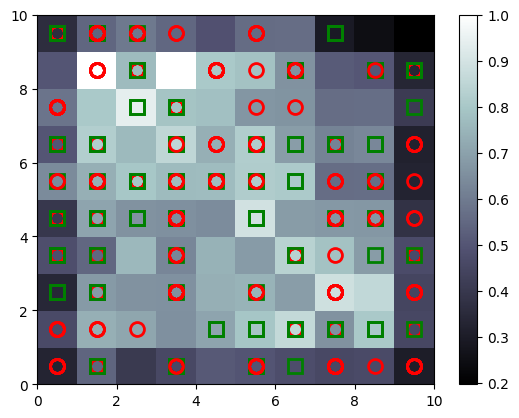

In [10]:
# NOTE:
# The graph might look different each time that you run 'entire notebook', it's because
# random weights the we initize will be different each time.
bone()

# We will get 10 X 10 graph because our array shape is 10 X 10,
# if you are not clear read appendix section of this notebook
pcolor(som.distance_map())

# In the generated graph white color nodes(grid) are having highest MID and dark-blue(grid) has lowest MID
# The white color nodes potentially outlier and possible repesent fradulent customers
colorbar()

# Now we will check each winning node approved credit load or not. For this we are going to use
# output label
markers = ["o", "s"]
color = ["r", "g"]

for index, customer_data in enumerate(X):
    winning_node = som.winner(customer_data)
    plot(
        winning_node[0] + 0.5,  # Represent X co-ordinate and 0.5 to move marker in the center of grid
        winning_node[1] + 0.5,  # Represent Y co-ordinate and 0.5 to move marker in the center of grid
        markers[y[index]],  # If Y is 0, not approved and it repesented with "o", For approved it is 1 and "s"
        markeredgecolor=color[y[index]],
        markerfacecolor="None",  # Some color filled inside markers if you remove this one
        markersize=10,
        markeredgewidth=2
    )

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Finding the frauds</span>

<p style="text-align: justify; text-justify: inter-word;">
    In the above Graph, the wight grids represents potential outliers or fraudulent customers. We are going to use
    <code>som.win_map(data)</code> method to get customers associated with these white grids by looking at graph and grabing
    co-ordinates.
</p>

In [11]:
mappings = som.win_map(X)

In [16]:
frauds = mappings[(1, 9)]

In [17]:
frauds = sc.inverse_transform(frauds) # converting to original form

In [18]:
frauds

array([[1.5726466e+07, 1.0000000e+00, 1.7420000e+01, 6.5000000e+00,
        2.0000000e+00, 3.0000000e+00, 4.0000000e+00, 1.2500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 6.0000000e+01, 1.0100000e+02],
       [1.5692408e+07, 1.0000000e+00, 4.8080000e+01, 6.0400000e+00,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.6910000e+03],
       [1.5694530e+07, 1.0000000e+00, 4.1170000e+01, 1.3350000e+00,
        2.0000000e+00, 2.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6800000e+02, 1.0000000e+00],
       [1.5667451e+07, 1.0000000e+00, 3.9920000e+01, 5.0000000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 2.1000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,